In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error

balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           sep= ',', header= None)
print "Dataset Lenght:: ", len(balance_data)
print "Dataset Shape:: ", balance_data.shape
print "Dataset:: "
balance_data.head()

Dataset Lenght::  625
Dataset Shape::  (625, 5)
Dataset:: 


,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [2]:
X, Y = balance_data.iloc[:,1:5],balance_data.iloc[:,0]

In [3]:
# data_dmatrix = xgb.DMatrix(data=X,label=Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [4]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [5]:
# make predictions for test data
y_pred = model.predict(X_test)

In [6]:
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Accuracy is  87.2340425531915


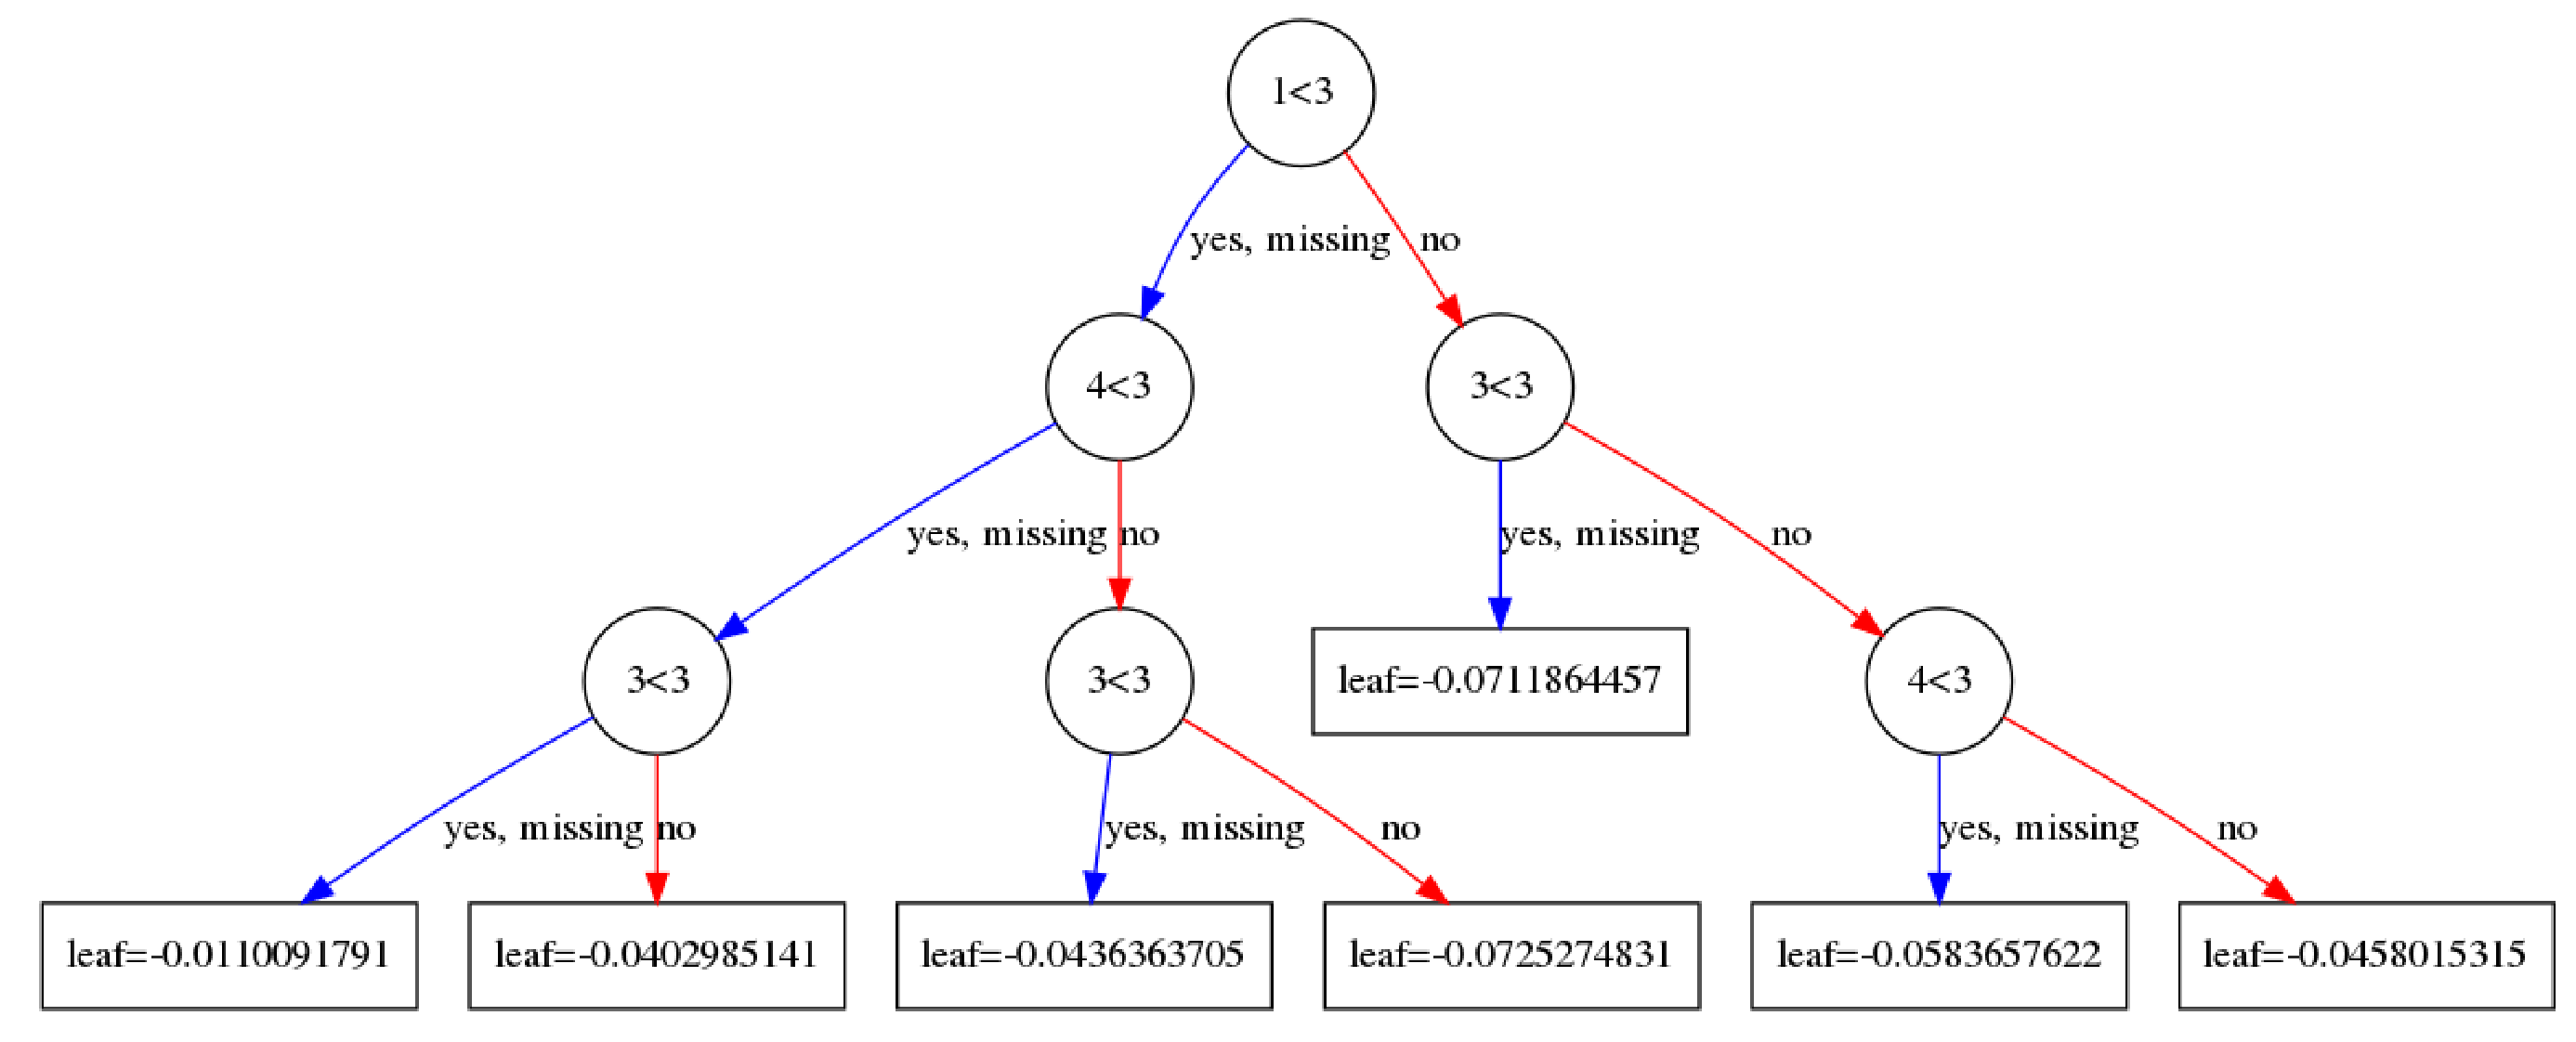

In [9]:
#Feature Importance
import matplotlib.pyplot as plt

xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 20]
plt.show()

In [10]:
model.feature_importances_

array([0.25874814, 0.25086248, 0.24001971, 0.25036964], dtype=float32)